In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib as mpl
%matplotlib inline
#pd.set_option('display.max_rows', None)

In [2]:
import seaborn as sns

In [3]:
plt.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family']='Malgun Gothic'

In [6]:
# 전처리 후 데이터
raw_df = pd.read_csv('data/Statistics_purpose_Prepreprocessing_compleated.csv')
raw_df

,crdCoBzkNm,sndCtgyNm,sxClNm,fstCtgyNm,agePrd,crdUseAmt,crdUseCnt,Year,Mouth,crdUseAmt_D_Cnt
0,양식,가족식사,남,가정친화,10대,12000,1,2018,1,12000
1,일반음식점기타,가족식사,남,가정친화,10대,100000,4,2018,1,25000
2,일식생선회집,가족식사,남,가정친화,10대,12000,1,2018,1,12000
3,중식,가족식사,남,가정친화,10대,30000,2,2018,1,15000
4,커피음료전문점,가족식사,남,가정친화,10대,30900,4,2018,1,7725
...,...,...,...,...,...,...,...,...,...,...
293781,일반치과한방병원,병의원진료,여,건강관리,80대,49700,1,2019,12,49700
293782,종합병원,병의원진료,여,건강관리,80대,95100,1,2019,12,95100
293783,약국,약국및의료기기구매,여,건강관리,80대,122300,1,2019,12,122300
293784,화장품점,미용,여,여가생활,80대,17000,1,2019,12,17000


In [7]:
raw_df.rename(columns={'Mouth':'Month'},inplace=True)

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293786 entries, 0 to 293785
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   crdCoBzkNm       293786 non-null  object
 1   sndCtgyNm        293786 non-null  object
 2   sxClNm           293786 non-null  object
 3   fstCtgyNm        293786 non-null  object
 4   agePrd           293786 non-null  object
 5   crdUseAmt        293786 non-null  int64 
 6   crdUseCnt        293786 non-null  int64 
 7   Year             293786 non-null  int64 
 8   Month            293786 non-null  int64 
 9   crdUseAmt_D_Cnt  293786 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 22.4+ MB


In [7]:
# 결측값 있는지
raw_df.isna().values.any()

False

In [8]:
raw_df.isnull().sum()

crdCoBzkNm         0
sndCtgyNm          0
sxClNm             0
fstCtgyNm          0
agePrd             0
crdUseAmt          0
crdUseCnt          0
Year               0
Month              0
crdUseAmt_D_Cnt    0
dtype: int64

In [10]:
raw_df.describe(include='all')

,crdCoBzkNm,sndCtgyNm,sxClNm,fstCtgyNm,agePrd,crdUseAmt,crdUseCnt,Year,Month,crdUseAmt_D_Cnt
count,293786,293786,293786,293786,293786,2.937860e+05,293786.000000,293786.000000,293786.000000,2.937860e+05
unique,813,36,2,6,8,NaN,NaN,NaN,NaN,NaN
top,렌트카,의류/잡화,남,가정친화,40대,NaN,NaN,NaN,NaN,NaN
freq,1073,23601,147492,124825,59587,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,6.962495e+07,1944.669651,2018.992525,6.515004,9.180856e+04
std,NaN,NaN,NaN,NaN,NaN,3.292628e+08,9881.068870,0.818243,3.449267,2.087359e+05
min,NaN,NaN,NaN,NaN,NaN,3.000000e+01,1.000000,2018.000000,1.000000,3.000000e+01
25%,NaN,NaN,NaN,NaN,NaN,4.607650e+05,9.000000,2018.000000,4.000000,2.030300e+04
50%,NaN,NaN,NaN,NaN,NaN,3.439892e+06,62.000000,2019.000000,7.000000,4.296100e+04
75%,NaN,NaN,NaN,NaN,NaN,2.176756e+07,438.000000,2020.000000,10.000000,9.144975e+04


<AxesSubplot:>

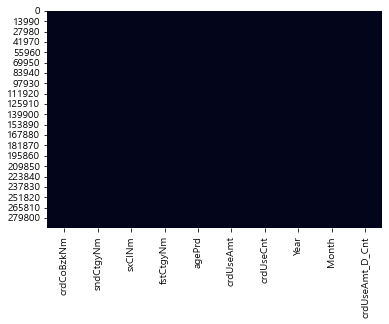

In [9]:
# seaborn으로 결측치 확인
sns.heatmap(raw_df.isnull(),cbar=False)

## 남,여 카드소비금액,건수 파이그래프

In [185]:
# 복사본
data = raw_df.copy()

In [187]:
gen = data.groupby('sxClNm').sum().reset_index()
gen

,sxClNm,crdUseAmt,crdUseCnt,Year,Month,crdUseAmt_D_Cnt
0,남,8403598799690,249155743,297785536,961357,13227233580
1,여,12051235300546,322160975,295366202,952660,13744837477


In [188]:
# 남,여 카드소비횟수
gen1 = gen.drop(['crdUseAmt','Year','Month'], axis=1)
gen1

,sxClNm,crdUseCnt,crdUseAmt_D_Cnt
0,남,249155743,13227233580
1,여,322160975,13744837477


In [189]:
gen1 = gen1.transpose()
gen1 = gen1.rename(columns=gen1.iloc[0])
gen1

,남,여
sxClNm,남,여
crdUseCnt,249155743,322160975
crdUseAmt_D_Cnt,13227233580,13744837477


In [190]:
gen1 = gen1.drop(gen1.index[0])
gen1

,남,여
crdUseCnt,249155743,322160975
crdUseAmt_D_Cnt,13227233580,13744837477


In [191]:
men = gen1[['남']].values[0][0]
wo = gen1[['여']].values[0][0]

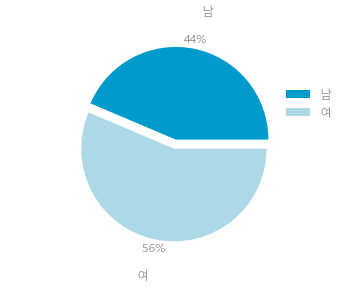

In [192]:
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9','#C1F0F6', '#0099CC']
fig, ax = plt.subplots()

from matplotlib import font_manager, rc 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family=font_name)


#plt.rcParams['font.sans-serif'] = 'Arial'
#plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12


labels = ['남', '여']
percentages = [men, wo]
explode=(0.1,0) # 분리 
ax.pie(percentages, explode=explode, labels=labels,  
       colors=color_palette_list[0:2], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.1,labeldistance=1.4)
ax.axis('equal')
#ax.set_title("남,여 카드소비횟수")
ax.legend(frameon=False,bbox_to_anchor=(1.0,0.8))
plt.show()

In [194]:
# 남,여 카드소비금액
gen = data.groupby('sxClNm').sum().reset_index()
gen2 = gen.drop(['crdUseAmt','Year','Month'], axis=1)
gen2

,sxClNm,crdUseCnt,crdUseAmt_D_Cnt
0,남,249155743,13227233580
1,여,322160975,13744837477


In [195]:
gen2 = gen2.transpose()
gen2 = gen2.rename(columns=gen2.iloc[0])
gen2 = gen2.drop(gen2.index[0])
gen2

,남,여
crdUseCnt,249155743,322160975
crdUseAmt_D_Cnt,13227233580,13744837477


In [196]:
men2 = gen2[['남']].values[0][0]
wo2 = gen2[['여']].values[0][0]

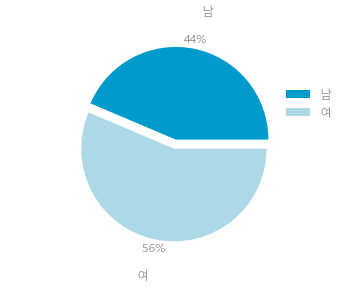

In [197]:
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9','#C1F0F6', '#0099CC']
fig, ax = plt.subplots()

from matplotlib import font_manager, rc 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family=font_name)


#plt.rcParams['font.sans-serif'] = 'Arial'
#plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12


labels = ['남', '여']
percentages = [men2, wo2]
explode=(0.1,0) # 분리 
ax.pie(percentages, explode=explode, labels=labels,  
       colors=color_palette_list[0:2], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.1,labeldistance=1.4)
ax.axis('equal')
#ax.set_title("남,여 카드소비금액")
ax.legend(frameon=False,bbox_to_anchor=(1.0,0.8))
plt.show()

## (전처리 후 데이터) 컬럼 한글

In [10]:
data = raw_df.copy()
data

,crdCoBzkNm,sndCtgyNm,sxClNm,fstCtgyNm,agePrd,crdUseAmt,crdUseCnt,Year,Month,crdUseAmt_D_Cnt
0,양식,가족식사,남,가정친화,10대,12000,1,2018,1,12000
1,일반음식점기타,가족식사,남,가정친화,10대,100000,4,2018,1,25000
2,일식생선회집,가족식사,남,가정친화,10대,12000,1,2018,1,12000
3,중식,가족식사,남,가정친화,10대,30000,2,2018,1,15000
4,커피음료전문점,가족식사,남,가정친화,10대,30900,4,2018,1,7725
...,...,...,...,...,...,...,...,...,...,...
293781,일반치과한방병원,병의원진료,여,건강관리,80대,49700,1,2019,12,49700
293782,종합병원,병의원진료,여,건강관리,80대,95100,1,2019,12,95100
293783,약국,약국및의료기기구매,여,건강관리,80대,122300,1,2019,12,122300
293784,화장품점,미용,여,여가생활,80대,17000,1,2019,12,17000


In [11]:
data.columns = ['업종명칭','2차분류코드명','성별','1차분류코드명','연령별','사용금액','사용건수','연도별','월별','사용금액_D']
df=data
df

,업종명칭,2차분류코드명,성별,1차분류코드명,연령별,사용금액,사용건수,연도별,월별,사용금액_D
0,양식,가족식사,남,가정친화,10대,12000,1,2018,1,12000
1,일반음식점기타,가족식사,남,가정친화,10대,100000,4,2018,1,25000
2,일식생선회집,가족식사,남,가정친화,10대,12000,1,2018,1,12000
3,중식,가족식사,남,가정친화,10대,30000,2,2018,1,15000
4,커피음료전문점,가족식사,남,가정친화,10대,30900,4,2018,1,7725
...,...,...,...,...,...,...,...,...,...,...
293781,일반치과한방병원,병의원진료,여,건강관리,80대,49700,1,2019,12,49700
293782,종합병원,병의원진료,여,건강관리,80대,95100,1,2019,12,95100
293783,약국,약국및의료기기구매,여,건강관리,80대,122300,1,2019,12,122300
293784,화장품점,미용,여,여가생활,80대,17000,1,2019,12,17000


In [40]:
df.describe(include='all')

,업종명칭,2차분류코드명,성별,1차분류코드명,연령별,사용금액,사용건수,연도별,월별,사용금액_D
count,293786,293786,293786,293786,293786,2.937860e+05,293786.000000,293786.000000,293786.000000,2.937860e+05
unique,813,36,2,6,8,NaN,NaN,NaN,NaN,NaN
top,렌트카,의류/잡화,남,가정친화,40대,NaN,NaN,NaN,NaN,NaN
freq,1073,23601,147492,124825,59587,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,6.962495e+07,1944.669651,2018.992525,6.515004,9.180856e+04
std,NaN,NaN,NaN,NaN,NaN,3.292628e+08,9881.068870,0.818243,3.449267,2.087359e+05
min,NaN,NaN,NaN,NaN,NaN,3.000000e+01,1.000000,2018.000000,1.000000,3.000000e+01
25%,NaN,NaN,NaN,NaN,NaN,4.607650e+05,9.000000,2018.000000,4.000000,2.030300e+04
50%,NaN,NaN,NaN,NaN,NaN,3.439892e+06,62.000000,2019.000000,7.000000,4.296100e+04
75%,NaN,NaN,NaN,NaN,NaN,2.176756e+07,438.000000,2020.000000,10.000000,9.144975e+04


In [41]:
df['연도별'] = df['연도별'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293786 entries, 0 to 293785
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   업종명칭     293786 non-null  object
 1   2차분류코드명  293786 non-null  object
 2   성별       293786 non-null  object
 3   1차분류코드명  293786 non-null  object
 4   연령별      293786 non-null  object
 5   사용금액     293786 non-null  int64 
 6   사용건수     293786 non-null  int64 
 7   연도별      293786 non-null  object
 8   월별       293786 non-null  int64 
 9   사용금액_D   293786 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 22.4+ MB


## 연월별

In [76]:
df

,업종명칭,2차분류코드명,성별,1차분류코드명,연령별,사용금액,사용건수,연도별,월별,사용금액_D
0,양식,가족식사,남,가정친화,10대,12000,1,2018,1,12000
1,일반음식점기타,가족식사,남,가정친화,10대,100000,4,2018,1,25000
2,일식생선회집,가족식사,남,가정친화,10대,12000,1,2018,1,12000
3,중식,가족식사,남,가정친화,10대,30000,2,2018,1,15000
4,커피음료전문점,가족식사,남,가정친화,10대,30900,4,2018,1,7725
...,...,...,...,...,...,...,...,...,...,...
293781,일반치과한방병원,병의원진료,여,건강관리,80대,49700,1,2019,12,49700
293782,종합병원,병의원진료,여,건강관리,80대,95100,1,2019,12,95100
293783,약국,약국및의료기기구매,여,건강관리,80대,122300,1,2019,12,122300
293784,화장품점,미용,여,여가생활,80대,17000,1,2019,12,17000


In [78]:
result1 = df[['연도별', '2차분류코드명','사용금액']][df['연도별']==2018]
result1

,연도별,2차분류코드명,사용금액
0,2018,가족식사,12000
1,2018,가족식사,100000
2,2018,가족식사,12000
3,2018,가족식사,30000
4,2018,가족식사,30900
...,...,...,...
293710,2018,미용,62000
293711,2018,생활편의시설(유통),17500
293712,2018,생활편의시설(유통),220000
293713,2018,생활편의시설(유통),99820


In [79]:
result2 = df[['연도별', '2차분류코드명','사용금액']][df['연도별']==2019]
result2

,연도별,2차분류코드명,사용금액
9948,2019,가족식사,12831005
9949,2019,가족식사,103000
9950,2019,가족식사,1443740
9951,2019,가족식사,41000
9952,2019,가족식사,11899300
...,...,...,...
293781,2019,병의원진료,49700
293782,2019,병의원진료,95100
293783,2019,약국및의료기기구매,122300
293784,2019,미용,17000


In [82]:
# 2018년도 사용금액 합
res1 = result1.groupby('연도별')['사용금액'].sum().reset_index()
res1

,연도별,사용금액
0,2018,6447358822678


In [83]:
# 2019년도 사용금액 합
res2 = result2.groupby('연도별')['사용금액'].sum().reset_index()
res2

,연도별,사용금액
0,2019,7212021732568


In [84]:
df_res = pd.concat([res1,res2])
df_res

,연도별,사용금액
0,2018,6447358822678
0,2019,7212021732568


In [85]:
df_rest = df_res.transpose()
df_rest

,0,0
연도별,2018,2019
사용금액,6447358822678,7212021732568


In [87]:
# 월별
dff = df.groupby('연도별').sum()
dff

,사용금액,사용건수,월별,사용금액_D
연도별,,,,
2018,6447358822678,179191644,649173,9056918769
2019,7212021732568,204607175,630172,8798655707
2020,6795453544990,187517899,634672,9116496581


In [89]:
dff = dff.drop(['사용금액_D','월별'], axis=1)
dff

,사용금액,사용건수
연도별,,
2018,6447358822678,179191644
2019,7212021732568,204607175
2020,6795453544990,187517899


## 1차분류

In [13]:
df

,업종명칭,2차분류코드명,성별,1차분류코드명,연령별,사용금액,사용건수,연도별,월별,사용금액_D
0,양식,가족식사,남,가정친화,10대,12000,1,2018,1,12000
1,일반음식점기타,가족식사,남,가정친화,10대,100000,4,2018,1,25000
2,일식생선회집,가족식사,남,가정친화,10대,12000,1,2018,1,12000
3,중식,가족식사,남,가정친화,10대,30000,2,2018,1,15000
4,커피음료전문점,가족식사,남,가정친화,10대,30900,4,2018,1,7725
...,...,...,...,...,...,...,...,...,...,...
293781,일반치과한방병원,병의원진료,여,건강관리,80대,49700,1,2019,12,49700
293782,종합병원,병의원진료,여,건강관리,80대,95100,1,2019,12,95100
293783,약국,약국및의료기기구매,여,건강관리,80대,122300,1,2019,12,122300
293784,화장품점,미용,여,여가생활,80대,17000,1,2019,12,17000


In [174]:
grouped_df = df.groupby('1차분류코드명')
grouped_df.first()

,업종명칭,2차분류코드명,성별,연령별,사용금액,사용건수,연도별,월별,사용금액_D
1차분류코드명,,,,,,,,,
가정친화,양식,가족식사,남,10대,12000,1,2018,1,12000
건강관리,일반치과한의원,병의원진료,남,10대,5100,1,2018,1,5100
여가생활,RF교통기관수수료선취,여행/교통,남,10대,58800,16,2018,1,3675
온누리(지역사랑)상품권,온누리상품권,온누리(지역사랑)(개인구매),남,20대,400000,1,2019,4,400000
온누리상품권,온누리상품권,온누리상품권(개인구매),남,20대,10000,1,2018,2,10000
자기계발,문방구점,학습자재/도서구매,남,10대,2800,1,2018,1,2800


In [175]:
grouped_df.size()

1차분류코드명
가정친화            124825
건강관리             32395
여가생활            120197
온누리(지역사랑)상품권       112
온누리상품권              81
자기계발             16176
dtype: int64

In [62]:
df.groupby('1차분류코드명').get_group('온누리(지역사랑)상품권')

,업종명칭,2차분류코드명,성별,1차분류코드명,연령별,사용금액,사용건수,연도별,월별,사용금액_D
12089,온누리상품권,온누리(지역사랑)(개인구매),남,온누리(지역사랑)상품권,20대,400000,1,2019,4,400000
13277,온누리상품권,온누리(지역사랑)(개인구매),남,온누리(지역사랑)상품권,20대,510000,2,2019,5,255000
13929,온누리상품권,온누리(지역사랑)(개인구매),남,온누리(지역사랑)상품권,20대,50000,1,2019,6,50000
14473,온누리상품권,온누리(지역사랑)(개인구매),남,온누리(지역사랑)상품권,20대,40000,1,2019,7,40000
15242,온누리상품권,온누리(지역사랑)(개인구매),남,온누리(지역사랑)상품권,20대,100000,2,2019,8,50000
...,...,...,...,...,...,...,...,...,...,...
260354,온누리상품권,온누리(지역사랑)(개인구매),여,온누리(지역사랑)상품권,50대,400000,1,2020,5,400000
260515,온누리상품권,온누리(지역사랑)(개인구매),여,온누리(지역사랑)상품권,50대,320000,2,2020,6,160000
262769,온누리상품권,온누리(지역사랑)(개인구매),여,온누리(지역사랑)상품권,50대,20000,1,2020,8,20000
275843,온누리상품권,온누리(지역사랑)(개인구매),여,온누리(지역사랑)상품권,60대,10000,1,2019,3,10000


In [169]:
df_1 = df.drop(['업종명칭','2차분류코드명','성별','1차분류코드명','연령별','연도별','월별'],axis=1)
df_1

,사용금액,사용건수,사용금액_D
0,12000,1,12000
1,100000,4,25000
2,12000,1,12000
3,30000,2,15000
4,30900,4,7725
...,...,...,...
293781,49700,1,49700
293782,95100,1,95100
293783,122300,1,122300
293784,17000,1,17000


In [170]:
df_1.describe(include='all')

,사용금액,사용건수,사용금액_D
count,2.937860e+05,293786.000000,2.937860e+05
mean,6.962495e+07,1944.669651,9.180856e+04
std,3.292628e+08,9881.068870,2.087359e+05
min,3.000000e+01,1.000000,3.000000e+01
25%,4.607650e+05,9.000000,2.030300e+04
50%,3.439892e+06,62.000000,4.296100e+04
75%,2.176756e+07,438.000000,9.144975e+04
max,9.992119e+09,312666.000000,1.203250e+07


In [39]:
df_std = df_1.groupby('1차분류코드명').std()
df_std.sort_values(by='사용금액', ascending=False, inplace=True)
df_std

,사용금액,Year
1차분류코드명,,
여가생활,4.018265e+08,0.818037
가정친화,2.725760e+08,0.818913
건강관리,2.595681e+08,0.817526
자기계발,1.608001e+08,0.817702
온누리(지역사랑)상품권,3.267086e+05,0.488527
온누리상품권,2.653154e+05,0.282734


In [40]:
group_date=df_1.groupby('사용연월')
group_date.first()

,1차분류코드명,사용금액,Year
사용연월,,,
2018-01-01,가정친화,12000,2018
2018-02-01,가정친화,36000,2018
2018-03-01,가정친화,4000,2018
2018-04-01,가정친화,10000,2018
2018-05-01,가정친화,21300,2018
2018-06-01,가정친화,114300,2018
2018-07-01,가정친화,18800,2018
2018-08-01,가정친화,164150,2018
2018-09-01,가정친화,16700,2018


In [41]:
df_1.groupby('사용연월')['사용금액'].mean()

사용연월
2018-01-01    6.412888e+07
2018-02-01    5.922688e+07
2018-03-01    6.016116e+07
2018-04-01    6.009320e+07
2018-05-01    6.794703e+07
2018-06-01    6.264851e+07
2018-07-01    6.874322e+07
2018-08-01    6.722872e+07
2018-09-01    6.248466e+07
2018-10-01    6.657030e+07
2018-11-01    6.238562e+07
2018-12-01    6.718501e+07
2019-01-01    7.393960e+07
2019-02-01    6.643860e+07
2019-03-01    6.853501e+07
2019-04-01    7.180018e+07
2019-05-01    7.574454e+07
2019-06-01    7.288967e+07
2019-07-01    7.418726e+07
2019-08-01    8.192616e+07
2019-09-01    6.833750e+07
2019-10-01    7.563756e+07
2019-11-01    7.386489e+07
2019-12-01    7.939642e+07
2020-01-01    7.190597e+07
2020-02-01    6.707159e+07
2020-03-01    6.854405e+07
2020-04-01    6.709676e+07
2020-05-01    7.305015e+07
2020-06-01    6.883088e+07
2020-07-01    6.935280e+07
2020-08-01    7.437117e+07
2020-09-01    6.596565e+07
2020-10-01    6.893590e+07
2020-11-01    6.830594e+07
2020-12-01    6.687799e+07
Name: 사용금액, dtype: floa

## 2차분류

In [42]:
df_2 = df.drop(['업종명칭','1차분류코드명','2차분류코드','성별','일련번호','1차분류코드','연령별','사용건수'],axis=1)
df_2

,2차분류코드명,사용연월,사용금액,Year
0,가족식사,2018-01-01,12000,2018
1,가족식사,2018-01-01,100000,2018
2,가족식사,2018-01-01,12000,2018
3,가족식사,2018-01-01,30000,2018
4,가족식사,2018-01-01,30900,2018
...,...,...,...,...
296897,병의원진료,2019-12-01,49700,2019
296898,병의원진료,2019-12-01,95100,2019
296899,약국및의료기기구매,2019-12-01,122300,2019
296900,미용,2019-12-01,17000,2019


In [43]:
df_2.describe(include='all')

C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,2차분류코드명,사용연월,사용금액,Year
count,296902,296902,2.969020e+05,296902.000000
unique,36,36,NaN,NaN
top,의류/잡화,2018-10-01 00:00:00,NaN,NaN
freq,23601,8541,NaN,NaN
first,NaN,2018-01-01 00:00:00,NaN,NaN
last,NaN,2020-12-01 00:00:00,NaN,NaN
mean,NaN,NaN,6.890937e+07,2018.991856
std,NaN,NaN,3.276041e+08,0.818310
min,NaN,NaN,3.000000e+01,2018.000000
25%,NaN,NaN,4.560000e+05,2018.000000


In [44]:
df_2.head(10)

,2차분류코드명,사용연월,사용금액,Year
0,가족식사,2018-01-01,12000,2018
1,가족식사,2018-01-01,100000,2018
2,가족식사,2018-01-01,12000,2018
3,가족식사,2018-01-01,30000,2018
4,가족식사,2018-01-01,30900,2018
5,가족식사,2018-01-01,29600,2018
6,가족식사,2018-01-01,8600,2018
7,가족식사,2018-01-01,1000,2018
8,가족식사,2018-01-01,110150,2018
9,음료/식품,2018-01-01,23000,2018


## 상관계수

In [176]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [200]:
df

,업종명칭,2차분류코드명,성별,1차분류코드명,연령별,사용금액,사용건수,연도별,월별,사용금액_D
0,양식,가족식사,남,가정친화,10대,12000,1,2018,1,12000
1,일반음식점기타,가족식사,남,가정친화,10대,100000,4,2018,1,25000
2,일식생선회집,가족식사,남,가정친화,10대,12000,1,2018,1,12000
3,중식,가족식사,남,가정친화,10대,30000,2,2018,1,15000
4,커피음료전문점,가족식사,남,가정친화,10대,30900,4,2018,1,7725
...,...,...,...,...,...,...,...,...,...,...
293781,일반치과한방병원,병의원진료,여,건강관리,80대,49700,1,2019,12,49700
293782,종합병원,병의원진료,여,건강관리,80대,95100,1,2019,12,95100
293783,약국,약국및의료기기구매,여,건강관리,80대,122300,1,2019,12,122300
293784,화장품점,미용,여,여가생활,80대,17000,1,2019,12,17000


In [201]:
df.corr()

,사용금액,사용건수,연도별,월별,사용금액_D
사용금액,1.000000,0.796017,0.006330,0.003114,-0.012564
사용건수,0.796017,1.000000,0.005303,0.007021,-0.052806
연도별,0.006330,0.005303,1.000000,-0.000234,0.005205
월별,0.003114,0.007021,-0.000234,1.000000,-0.009638
사용금액_D,-0.012564,-0.052806,0.005205,-0.009638,1.000000


<AxesSubplot:>

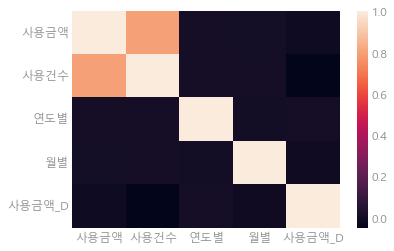

In [202]:
sns.heatmap(df.corr())

## 교차표

In [20]:
df

,업종명칭,2차분류코드명,성별,1차분류코드명,연령별,사용금액,사용건수,연도별,월별,사용금액_D
0,양식,가족식사,남,가정친화,10대,12000,1,2018,1,12000
1,일반음식점기타,가족식사,남,가정친화,10대,100000,4,2018,1,25000
2,일식생선회집,가족식사,남,가정친화,10대,12000,1,2018,1,12000
3,중식,가족식사,남,가정친화,10대,30000,2,2018,1,15000
4,커피음료전문점,가족식사,남,가정친화,10대,30900,4,2018,1,7725
...,...,...,...,...,...,...,...,...,...,...
293781,일반치과한방병원,병의원진료,여,건강관리,80대,49700,1,2019,12,49700
293782,종합병원,병의원진료,여,건강관리,80대,95100,1,2019,12,95100
293783,약국,약국및의료기기구매,여,건강관리,80대,122300,1,2019,12,122300
293784,화장품점,미용,여,여가생활,80대,17000,1,2019,12,17000


In [12]:
# 남,여 연령별 수
pd.crosstab(df['성별'],df['연령별'])

연령별,10대,20대,30대,40대,50대,60대,70대,80대
성별,,,,,,,,
남,1550,24424,28752,29387,29205,26215,7387,572
여,2063,26953,29772,30200,29458,24487,3236,125


In [30]:
pd.crosstab(index=[df['성별'], df['연령별']],columns=df['2차분류코드명'])

2차분류코드명  가구/인테리어/건축자재  가전제품  가족식사  건강식품  결혼/장례서비스지원  공예/토산품  관광(외국인전용점)  기념품  \
성별 연령별                                                                         
남  10대             14     9   323     1          14       0           0    0   
   20대           1200   566  1220   255         533      36           0  132   
   30대           1676   696  1284   336         627      36           3  144   
   40대           1757   713  1286   361         616      36           6  144   
   50대           1743   693  1285   353         608      36           7  144   
   60대           1554   616  1271   296         563      36           8  135   
   70대            190   134   785    62         102       5           0    4   
   80대              5    15    71     4           3       0           0    0   
여  10대              5    16   373     2          11       0           0    7   
   20대           1397   641  1269   305         583      36           0  144   
   30대           1746   727  1283   392         636      36           8  144   
   40대           1792   715  1285   396         639      36           9  144   
   50대           1752   683  1285   393         616      36          19  143   
   60대           1280   593  1240   308         477      36           8  129   
   70대             56    41   342    28          48       1           0    0   
   80대              0     0     5     0           0       0           0    0   

2차분류코드명  기부금  레저/스포츠  ...  음료/식품  의류/잡화  자녀보육  전자상거래  제조/도매업관리  차량서비스/차량연료  \
성별 연령별                ...                                                    
남  10대     0      79  ...     88     61     0    137        13          83   
   20대    53    1672  ...   1042   1837   401   1176       521        1516   
   30대   109    1908  ...   1104   2299   743   1296       599        1733   
   40대   108    1920  ...   1108   2371   749   1325       627        1765   
   50대   108    1900  ...   1107   2384   691   1352       623        1765   
   60대   106    1654  ...   1080   2066   395   1248       567        1603   
   70대     8     295  ...    629    332     1    531       144         642   
   80대     1      10  ...     60     22     0     49         7          53   
여  10대     0      67  ...    127    168     0    208        16          55   
   20대    70    1743  ...   1091   2226   539   1303       584        1546   
   30대   112    1912  ...   1108   2499   727   1353       640        1723   
   40대   109    1936  ...   1108   2543   787   1362       649        1733   
   50대   109    1866  ...   1108   2509   634   1358       648        1704   
   60대    71    1535  ...   1078   2016   291   1269       540        1417   
   70대    10      81  ...    340    261     0    222        41         128   
   80대     0       1  ...      8      7     0      0         0           0   

2차분류코드명  취미생활  컴퓨터/통신  학습자재/도서구매  학원수강  
성별 연령별                                  
남  10대     23      23         39    19  
   20대   1227     497        634   656  
   30대   1587     566        848   812  
   40대   1668     587        896   831  
   50대   1637     586        883   838  
   60대   1357     506        725   668  
   70대    154     123        130    22  
   80대      2       3          2     1  
여  10대     39      32         77    29  
   20대   1457     539        803   773  
   30대   1719     595        913   825  
   40대   1788     600        906   841  
   50대   1659     581        863   840  
   60대   1118     445        638   615  
   70대     39      60         47     2  
   80대      0       0          0     0  

[16 rows x 36 columns]

In [32]:
pd.crosstab(index=[df['성별'], df['연령별']],columns=df['1차분류코드명'])

1차분류코드명   가정친화  건강관리   여가생활  온누리(지역사랑)상품권  온누리상품권  자기계발
성별 연령별                                                 
남  10대     635   112    745             0       0    58
   20대   10040  2609  10466            11       8  1290
   30대   12330  3049  11688            15      10  1660
   40대   12626  3116  11894            11      13  1727
   50대   12503  3137  11816            16      12  1721
   60대   11140  2888  10784             7       3  1393
   70대    3196  1076   2963             0       0   152
   80대     263   130    176             0       0     3
여  10대     826   155    976             0       0   106
   20대   11320  2865  11174            10       8  1576
   30대   12766  3257  11992            12       7  1738
   40대   12945  3326  12156            16      10  1747
   50대   12588  3275  11871            12       9  1703
   60대   10244  2819  10168             2       1  1253
   70대    1383   528   1276             0       0    49
   80대      20    53     52             0       0     0

In [23]:
pd.crosstab(df['성별'],df['연령별'], margins=True) # 행,열 합 추가

연령별,10대,20대,30대,40대,50대,60대,70대,80대,All
성별,,,,,,,,,
남,1550,24424,28752,29387,29205,26215,7387,572,147492
여,2063,26953,29772,30200,29458,24487,3236,125,146294
All,3613,51377,58524,59587,58663,50702,10623,697,293786


In [24]:
# 구성비율 교차표
# 전체를 값으로 나누어 0~1의 숫자를 만들고 전체 합은 1
pd.crosstab(df['성별'],df['연령별'], normalize=True) # 1=True 

연령별,10대,20대,30대,40대,50대,60대,70대,80대
성별,,,,,,,,
남,0.005276,0.083135,0.097867,0.100029,0.099409,0.089232,0.025144,0.001947
여,0.007022,0.091744,0.101339,0.102796,0.100270,0.083350,0.011015,0.000425


In [25]:
pd.crosstab(df['성별'],df['연령별'], normalize=False) # 0=False

연령별,10대,20대,30대,40대,50대,60대,70대,80대
성별,,,,,,,,
남,1550,24424,28752,29387,29205,26215,7387,572
여,2063,26953,29772,30200,29458,24487,3236,125


In [42]:
pd.set_option('display.float_format', lambda x: '%.f' % x)
pd.crosstab(index=[df['성별'],df['연령별']],columns=df['연도별'],values=df['사용금액'],
            aggfunc=np.sum, margins=True, margins_name='total')

연도별                2018          2019          2020           total
성별    연령별                                                          
남     10대      70969041           NaN     224252250       295221291
      20대  118189279156  110508603222  148291543652    376989426030
      30대  676241757826  696985477432  691879774884   2065107010142
      40대  895297473490  951665617608  884231599685   2731194690783
      50대  872344664196  927371454131  825574590213   2625290708540
      60대  162691143166  260432598450  178129987046    601253728662
      70대     508164007    1416667034    1454474394      3379305435
      80대      12209560      29515545      46983702        88708807
여     10대     123384649           NaN     273072499       396457148
      20대  349031154800  332670508298  390437173868   1072138836966
      30대 1157905248679 1224512683087 1180186172840   3562604104606
      40대 1309558920814 1542515701973 1467455913181   4319530535968
      50대  833130864223 1022194568932  924517369727   2779842802882
      60대   72157694532  141364296795  102300730858    315822722185
      70대      90890449     348182941     449906191       888979581
      80대       5004090       5857120           NaN        10861210
total     6447358822678 7212021732568 6795453544990  20454834100236

In [45]:
# 2019년 남자 10대 확인
man_grouped = df.groupby('성별').get_group('남')
man_grouped[man_grouped['연도별']==2019]

,업종명칭,2차분류코드명,성별,1차분류코드명,연령별,사용금액,사용건수,연도별,월별,사용금액_D
9948,간이음식점,가족식사,남,가정친화,20대,12831005,1138,2019,1,11275
9949,갈비전문점,가족식사,남,가정친화,20대,103000,2,2019,1,51500
9950,기타음식점,가족식사,남,가정친화,20대,1443740,119,2019,1,12132
9951,기타일반음식,가족식사,남,가정친화,20대,41000,1,2019,1,41000
9952,기타휴게음식점,가족식사,남,가정친화,20대,11899300,1311,2019,1,9076
...,...,...,...,...,...,...,...,...,...,...
147140,하나로마트,생활편의시설(유통),남,여가생활,80대,229810,10,2019,12,22981
147141,하나로클럽,생활편의시설(유통),남,여가생활,80대,58000,1,2019,12,58000
147142,할인점슈퍼마켓,생활편의시설(유통),남,여가생활,80대,224965,2,2019,12,112482
147143,전자상거래안심클릭미적용,전자상거래,남,여가생활,80대,1500,1,2019,12,1500


## (기본 데이터) 연월별 카드금액, 건수 그래프

In [38]:
one_df = pd.read_csv('data/카드이용내역.csv')
one_df

,crdCoBzkNm,sndCtgyNm,sndCtgy,sxClNm,useYymm,fstCtgyNm,agePrd,no,crdUseAmt,crdUseCnt,fstCtgy
0,양식,가족식사,A01,남,201801,가정친화,10대,1,12000,1,A
1,일반음식점 기타,가족식사,A01,남,201801,가정친화,10대,2,100000,4,A
2,일식 /생선회집,가족식사,A01,남,201801,가정친화,10대,3,12000,1,A
3,중식,가족식사,A01,남,201801,가정친화,10대,4,30000,2,A
4,커피 /음료전문점,가족식사,A01,남,201801,가정친화,10대,5,30900,4,A
...,...,...,...,...,...,...,...,...,...,...,...
296897,일반.치과.한방병원,병의원진료,B01,여,201912,건강관리,80대,4,49700,1,B
296898,종합병원,병의원진료,B01,여,201912,건강관리,80대,5,95100,1,B
296899,약국,약국및의료기기구매,B02,여,201912,건강관리,80대,6,122300,1,B
296900,화장품점,미용,D02,여,201912,여가생활,80대,7,17000,1,D


In [39]:
# '사용연월' 날짜데이터로 바꿔주기
one_df['연도별'] = pd.to_datetime(one_df['useYymm'], format='%Y%m', errors='coerce').dropna()
one_df

,crdCoBzkNm,sndCtgyNm,sndCtgy,sxClNm,useYymm,fstCtgyNm,agePrd,no,crdUseAmt,crdUseCnt,fstCtgy,연도별
0,양식,가족식사,A01,남,201801,가정친화,10대,1,12000,1,A,2018-01-01
1,일반음식점 기타,가족식사,A01,남,201801,가정친화,10대,2,100000,4,A,2018-01-01
2,일식 /생선회집,가족식사,A01,남,201801,가정친화,10대,3,12000,1,A,2018-01-01
3,중식,가족식사,A01,남,201801,가정친화,10대,4,30000,2,A,2018-01-01
4,커피 /음료전문점,가족식사,A01,남,201801,가정친화,10대,5,30900,4,A,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
296897,일반.치과.한방병원,병의원진료,B01,여,201912,건강관리,80대,4,49700,1,B,2019-12-01
296898,종합병원,병의원진료,B01,여,201912,건강관리,80대,5,95100,1,B,2019-12-01
296899,약국,약국및의료기기구매,B02,여,201912,건강관리,80대,6,122300,1,B,2019-12-01
296900,화장품점,미용,D02,여,201912,여가생활,80대,7,17000,1,D,2019-12-01


In [40]:
one_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296902 entries, 0 to 296901
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   crdCoBzkNm  296902 non-null  object        
 1   sndCtgyNm   296902 non-null  object        
 2   sndCtgy     296902 non-null  object        
 3   sxClNm      296902 non-null  object        
 4   useYymm     296902 non-null  int64         
 5   fstCtgyNm   296902 non-null  object        
 6   agePrd      296902 non-null  object        
 7   no          296902 non-null  int64         
 8   crdUseAmt   296902 non-null  int64         
 9   crdUseCnt   296902 non-null  int64         
 10  fstCtgy     296902 non-null  object        
 11  연도별         296902 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 27.2+ MB


In [41]:
# 시분초 없애기
# df['사용연월'] = pd.to_datetime(df['사용연월']).dt.normalize()
# df

In [42]:
grouped_one_df = one_df.groupby('연도별').sum()
grouped_one_df = grouped_one_df.drop(['useYymm','no'],axis=1)

In [43]:
grouped_df_Amt = grouped_one_df.drop('crdUseCnt', axis=1)
grouped_df_Amt

,crdUseAmt
연도별,
2018-01-01,530217581316
2018-02-01,485838088993
2018-03-01,501864398006
2018-04-01,500456149680
2018-05-01,571026839582
2018-06-01,526372769185
2018-07-01,577718060409
2018-08-01,569091099254
2018-09-01,530057399640


In [54]:
grouped_df_Amt.reset_index(inplace=True)

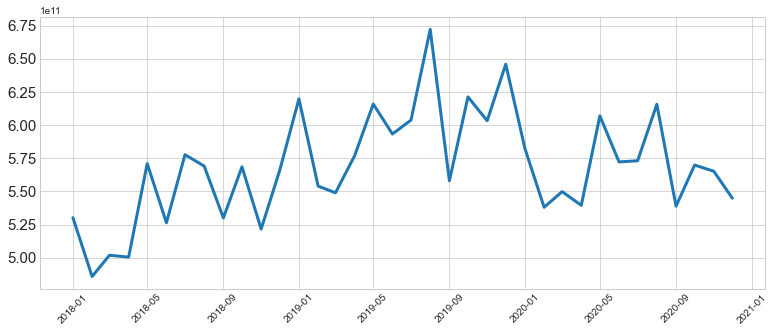

In [49]:
# 연월별 카드사용금액 Amt
plt.style.use(['seaborn-whitegrid'])
plt.figure(figsize=(13,5))
ax=sns.lineplot(x='연도별', y='crdUseAmt', data=grouped_df_Amt, linewidth='3')

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('')
plt.ylabel('')
#plt.grid(False)
#plt.legend(fontsize=13)
plt.show()

In [20]:
grouped_df_Cnt = grouped_one_df.drop('crdUseAmt', axis=1)
grouped_df_Cnt

,crdUseCnt
연도별,
2018-01-01,13730685
2018-02-01,12126314
2018-03-01,13352140
2018-04-01,14040306
2018-05-01,16117062
2018-06-01,15323392
2018-07-01,16219108
2018-08-01,16653955
2018-09-01,15133966


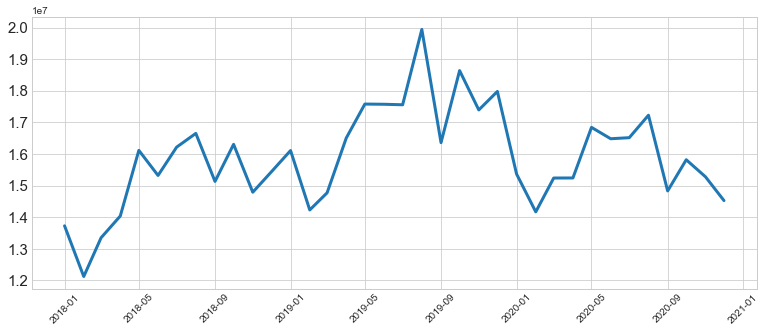

In [50]:
# 연월별 카드사용건수
plt.style.use(['seaborn-whitegrid'])
plt.figure(figsize=(13,5))
ax=sns.lineplot(x='연도별', y='crdUseCnt', data=grouped_df_Cnt, linewidth='3')

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('')
plt.ylabel('')
#plt.grid(False)
#plt.legend(fontsize=10)
plt.show()